In [1]:
import os
import sys
root_folder = os.path.dirname(os.getcwd())
sys.path.append(root_folder)
from ResoFit._pulse_shape import NeutronPulse
from ResoFit._pulse_shape import ProtonPulse
from ResoFit.experiment import Experiment
from ResoFit.simulation import Simulation
import numpy as np
import matplotlib.pyplot as plt
import pprint
import scipy

In [2]:
%matplotlib notebook

In [4]:
source_to_detector_m = 16.45
simulation = Simulation(energy_min=7, energy_max=150, energy_step=0.1, database='ENDF_VII')
simulation.add_layer(layer='Gd', layer_thickness_mm=0.15)
simulation._convolve_neutron_beam_shape(source_to_detector_m=source_to_detector_m)

'/Users/y9z/Documents/GitHub/ResoFit/ResoFit/result/neutron_pulse/ikeda_carpenter/Neutron_fitted_params_1eV_500eV_ikeda_carpenter.csv' exists...
Fitted parameters file loaded.
'/Users/y9z/Documents/GitHub/ResoFit/ResoFit/result/neutron_pulse/ikeda_carpenter/Loglog_linear_within_1eV_500eV_ikeda_carpenter.csv' exists...
Parameters linear fitted file loaded.
'/Users/y9z/Documents/GitHub/ResoFit/ResoFit/result/neutron_pulse/ikeda_carpenter/TOF_shape_eV_7.0_150.0_0.1_us_0.05_5500000.0_184_for_sum_16.45m_ikeda_carpenter.csv' exists...
TOF neutron beam shape file loaded.


<IPython.core.display.Javascript object>


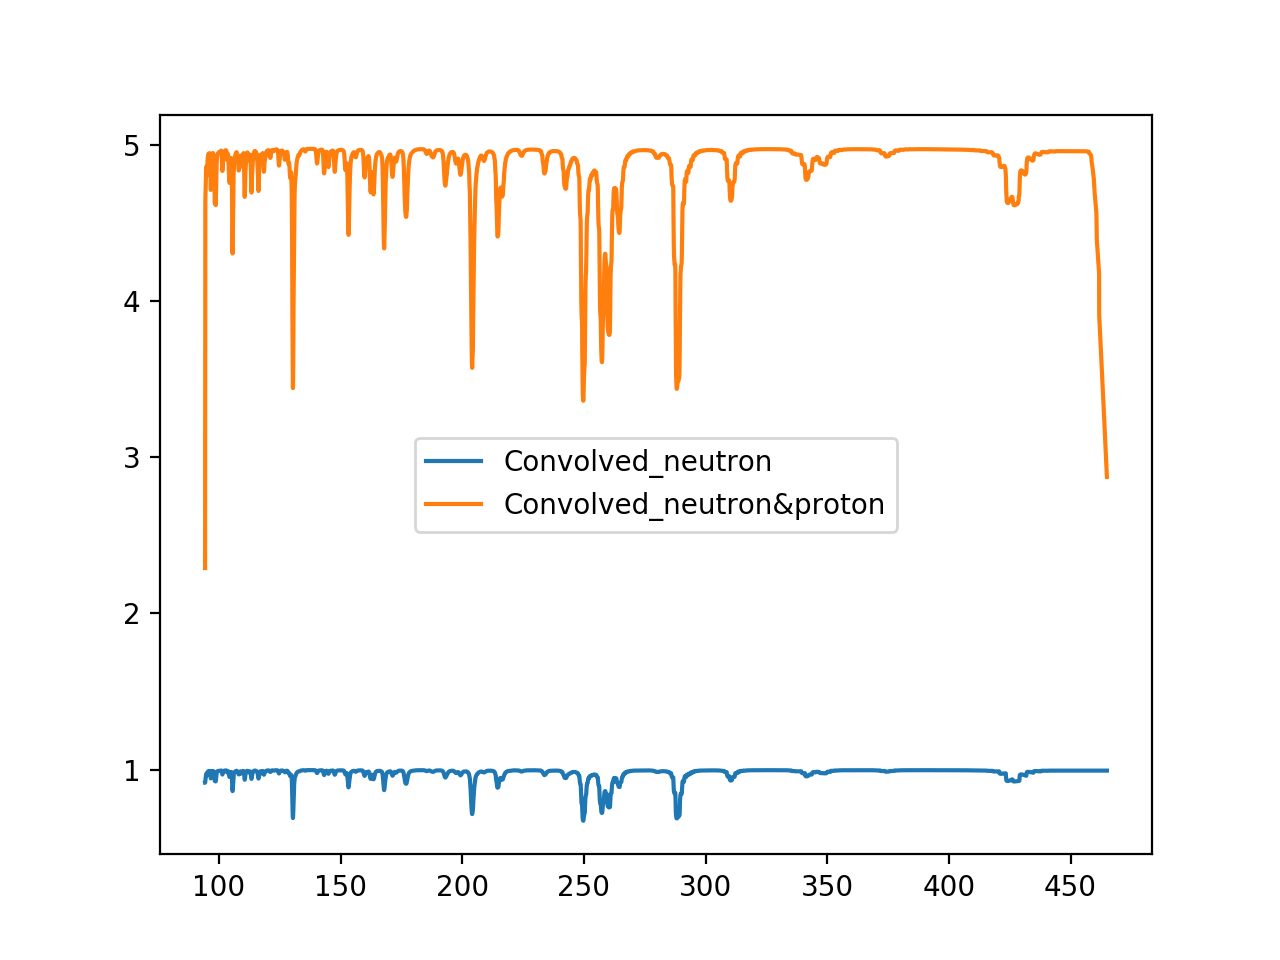

In [61]:
fig1, ax1 = plt.subplots()
ax1.plot(simulation.x_tof_us-2.9, 1-simulation.y_att, label='Convolved_neutron')
ax1.plot(simulation.x_tof_us-2.9, conv, label='Convolved_neutron&proton')
# plt.plot(simulation.y_transmission(), label='Convolution')
ax1.legend()

In [60]:
conv = np.convolve(1-simulation.y_att, s, mode='same')

<IPython.core.display.Javascript object>


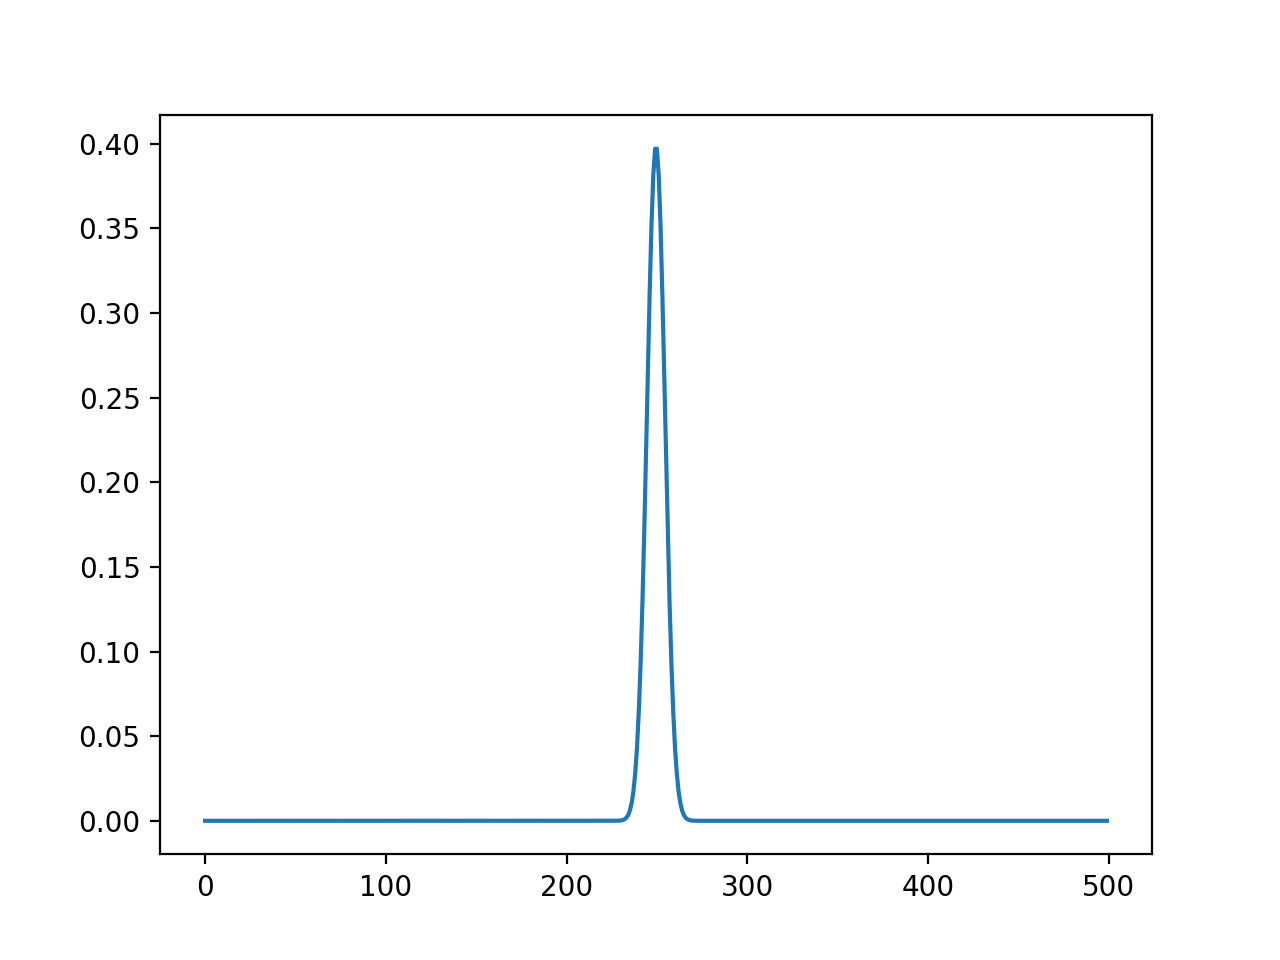

In [59]:
x = np.linspace(0, 100, 500)
s = scipy.stats.multivariate_normal.pdf(x=x,mean=50, cov=1)
fig2, ax2 = plt.subplots()
ax2.plot(s)

In [3]:
x = np.arange(200)
x

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

Name          Value      Min      Max   Stderr     Vary     Expr Brute_Step
amplitude  1.984e+04     -inf      inf    36.58     True     None     None
center         1909     -inf      inf   0.3126     True     None     None
fwhm          345.7     -inf      inf   0.7362    False 2.3548200*sigma     None
height         53.9     -inf      inf  0.09941    False 0.3989423*amplitude/max(1.e-15, sigma)     None
sigma         146.8        0      inf   0.3126     True     None     None


/Users/y9z/anaconda3/envs/py36/lib/python3.6/site-packages/lmfit/models.py:30: FutureWarning:

'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.



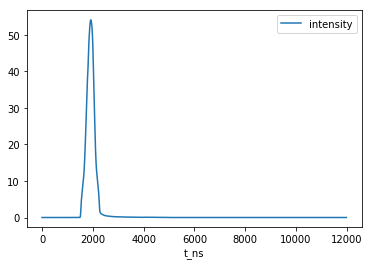

In [42]:
simulation.neutron_pulse.proton_pulse.fit_shape()
simulation.neutron_pulse.proton_pulse._shape_df.set_index('t_ns').plot()

In [48]:
trans = 1-simulation.y_att
arr_proton = np.array(simulation.neutron_pulse.proton_pulse._shape_df['intensity'])

In [49]:
con = np.convolve(trans, arr_proton, mode='same')

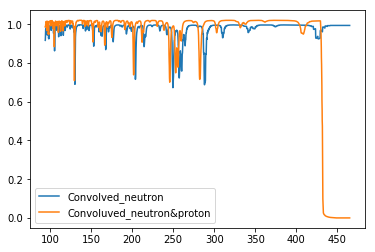

In [52]:
plt.plot(simulation.x_tof_us-2.9, trans, label='Convolved_neutron')
plt.plot(simulation.x_tof_us-2.9, con/1.984e+03, label='Convoluved_neutron&proton')
plt.legend()

In [18]:
folder = 'data/IPTS_19558/reso_data_19558'
data_file1 = 'Gd_thick.csv'
spectra_file = 'Image002_Spectra.txt'
expr = Experiment(data_file=data_file1,
                         spectra_file=spectra_file,
                         folder=folder,
                         baseline=True)

(-0.01, 1.0592436)

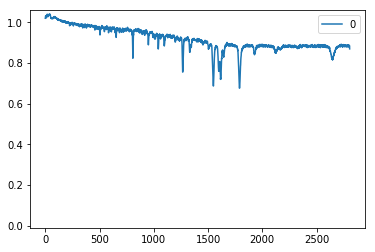

In [45]:
expr.data.plot()
plt.ylim(bottom=-0.01)

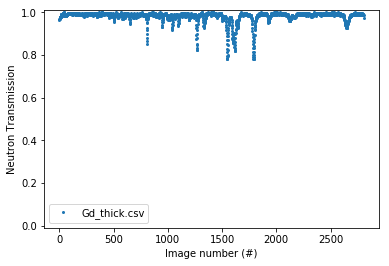

In [47]:
expr.plot_raw(x_type='number', y_type='transmission')

In [13]:
y1 = scipy.signal.gausspulse(x, fc=5)

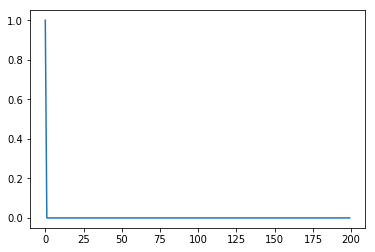

In [14]:
plt.plot(x, y1)

In [3]:
# path1 = '/Users/Shawn/Dropbox (ORNL)/Postdoc_Research/neutron_beam_shape/SNS/neutron_pulse/source_section_1.dat'
# path2 = '/Users/Shawn/Dropbox (ORNL)/Postdoc_Research/neutron_beam_shape/SNS/neutron_pulse/source_section_2.dat'
path1 = '/Users/y9z/Dropbox (ORNL)/Postdoc_Research/neutron_beam_shape/SNS/neutron_pulse/source_section_1.dat'
path2 = '/Users/y9z/Dropbox (ORNL)/Postdoc_Research/neutron_beam_shape/SNS/neutron_pulse/source_section_2.dat'

neutron_pulse = NeutronPulse(path1, model_index=1)

neutron_pulse.load_shape_each(path2)

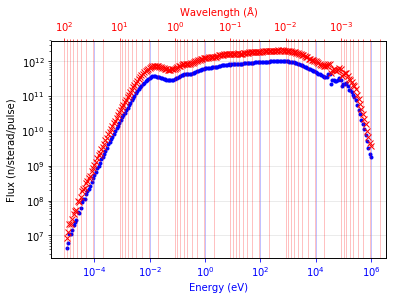

In [5]:
neutron_pulse.plot_shape_total()

In [10]:
neutron_pulse.fit_shape(e_min=1, e_max=500, drop=False, norm=True, check_each=False, save_fig=False,
                        overwrite_csv=False)

neutron_pulse.fit_params(check_each=False, loglog_fit=True, overwrite_csv=False)

'/Users/y9z/Documents/GitHub/ResoFit/ResoFit/result/neutron_pulse/ikeda_carpenter/Neutron_fitted_params_1eV_500eV_ikeda_carpenter.csv' exists...
Fitted parameters file loaded.
'/Users/y9z/Documents/GitHub/ResoFit/ResoFit/result/neutron_pulse/ikeda_carpenter/Loglog_linear_within_1eV_500eV_ikeda_carpenter.csv' exists...
Parameters linear fitted file loaded.


For 16.45 (m)
1.0 (eV) neutron spend 1189.1913964126795 (us)
2.0 (eV) neutron spend 840.8853005321057 (us)
3.0 (eV) neutron spend 686.5799728368476 (us)
4.0 (eV) neutron spend 594.5956982063398 (us)
5.0 (eV) neutron spend 531.8225601273303 (us)
6.0 (eV) neutron spend 485.4853546198106 (us)
7.0 (eV) neutron spend 449.47209945222556 (us)
8.0 (eV) neutron spend 420.44265026605285 (us)
9.0 (eV) neutron spend 396.3971321375599 (us)
10.0 (eV) neutron spend 376.0553386540257 (us)
11.0 (eV) neutron spend 358.5546968926954 (us)
12.0 (eV) neutron spend 343.2899864184238 (us)
13.0 (eV) neutron spend 329.82235046973386 (us)
14.0 (eV) neutron spend 317.82476947682295 (us)
15.0 (eV) neutron spend 307.04789825063006 (us)
16.0 (eV) neutron spend 297.2978491031699 (us)
17.0 (eV) neutron spend 288.4212786167789 (us)
18.0 (eV) neutron spend 280.29510017736845 (us)
19.0 (eV) neutron spend 272.819216920573 (us)
20.0 (eV) neutron spend 265.9112800636652 (us)
21.0 (eV) neutron spend 259.5028376119687 (us)
22

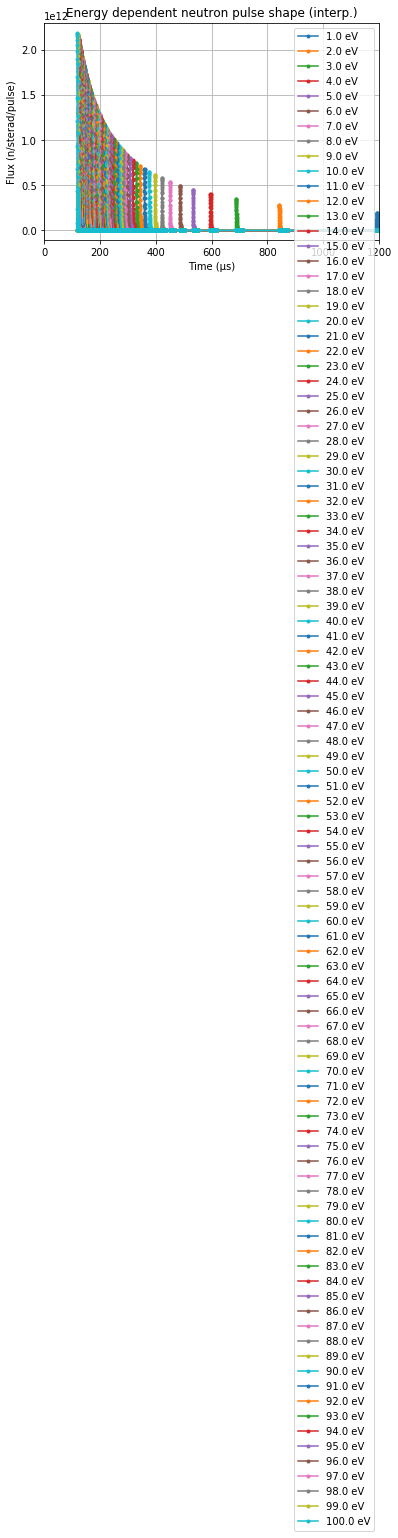

In [11]:
# e = np.linspace(5, 100, 20)
# neutron_pulse.make_shape([0.25, 1, 3, 4, 5, 6, 50, 100, 200])
# neutron_pulse.make_shape(e)

# neutron_pulse.plot_shape_total()


e_list = np.linspace(1, 100, 100)
# t_new = np.linspace(0.1, 30, 300)
t_new = None
# neutron_pulse.plot_shape_each_compare(e_min=15, e_max=200, norm=False, t_interp=None)
# neutron_pulse.plot_shape_interp(e_ev=e_list, t_interp=t_new, logy=False, norm=False)
neutron_pulse.plot_tof_shape_interp(e_ev=e_list, t_interp=t_new, for_sum=True, logy=False, norm=False, convolve_proton=False)
# plt.show()
# neutron_pulse._make_shape(e_ev=e_list, t_interp=t_new, for_sum=True, norm=False, convolve_proton=True)
# neutron_pulse.shape_tof_df_interp.set_index('tof_us').sum(axis=1).plot()
# neutron_pulse._make_shape(e_ev=e_list, t_interp=t_new, for_sum=True, norm=False)

In [12]:
neutron_pulse.shape_df_interp

,t_us,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,91.0,92.0,93.0,94.0,95.0,96.0,97.0,98.0,99.0,100.0
0,5.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,1.033000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,1.101300e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,1.174000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,1.251500e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
5,1.334200e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
6,1.422300e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
7,1.516300e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
8,1.616400e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,4.180087e+07,4.626705e+08,1.327463e+09,2.625598e+09,4.346751e+09,6.480846e+09,9.018046e+09
9,1.723200e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.605195e+10,3.123433e+10,3.683486e+10,4.284202e+10,4.924459e+10,5.603166e+10,6.319261e+10,7.071709e+10,7.859502e+10,8.681660e+10


In [15]:
pulse_60 = neutron_pulse.shape_df_interp[60]

In [77]:
_temp_df = neutron_pulse.proton_df
_max = max(_temp_df['intensity'])
_temp_df['norm'] = _temp_df['intensity']/_max
_temp_df = _temp_df.drop(_temp_df[_temp_df.norm <= 0.01].index)

In [78]:
_temp_df

,t_ns,intensity,norm
152,1520,1.120640,0.020716
153,1530,2.435963,0.045030
154,1540,3.745204,0.069232
155,1550,4.767047,0.088122
156,1560,5.633867,0.104145
157,1570,6.374172,0.117830
158,1580,7.032163,0.129994
159,1590,7.697528,0.142293
160,1600,8.327345,0.153936
161,1610,8.999129,0.166354


97

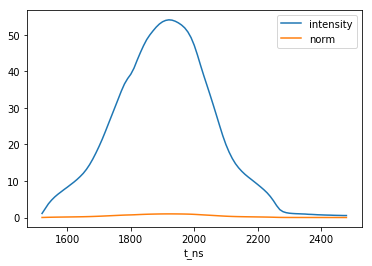

In [79]:
_temp_df.set_index('t_ns').plot()
# plt.xlim(left=1400, right=2500)
proton_yy = _temp_df['intensity']
len(proton_yy)

184

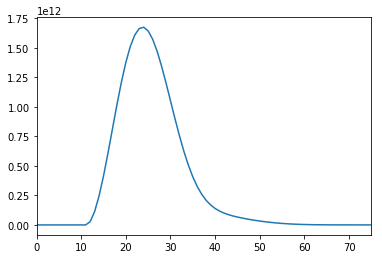

In [80]:
plt.plot(pulse_60)
plt.xlim(left=0, right=75)
len(pulse_60)

1200

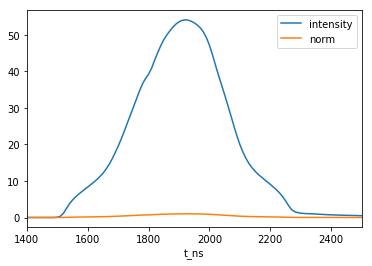

In [81]:
neutron_pulse.proton_df.set_index('t_ns').plot()
plt.xlim(left=1400, right=2500)
proton_y = neutron_pulse.proton_df['intensity']
len(proton_y)

280

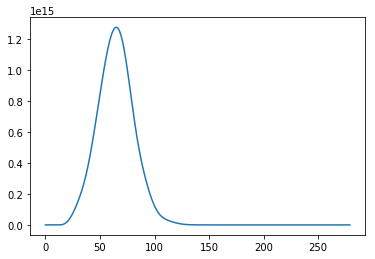

In [83]:
conv1 = np.convolve(pulse_60, proton_yy, mode='full')
plt.plot(conv1)
# plt.xlim(left=50, right=200)
len(conv1)

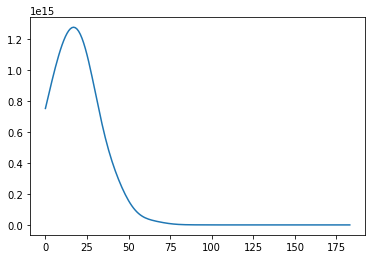

In [85]:
conv2 = np.convolve(proton_yy,pulse_60, mode='same')
plt.plot(conv2)
# plt.xlim(left=50, right=200)

In [51]:
all(conv1 == conv2)

True

(-10, 120)

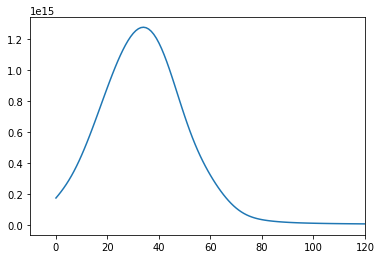

In [52]:
conv3 = np.convolve(pulse_60, proton_y, mode='valid')
plt.plot(conv3)
plt.xlim(left=-10, right=120)

(120, 320)

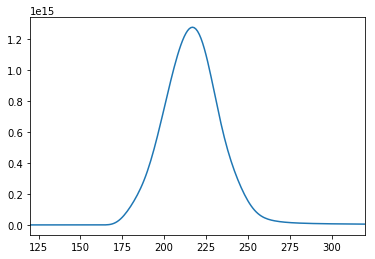

In [56]:
conv3 = np.convolve(pulse_60, proton_y, mode='full')
plt.plot(conv3)
plt.xlim(left=120, right=320)

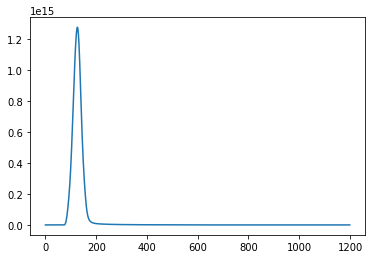

In [31]:
conv = np.convolve(proton_y, pulse_60, mode='same')
plt.plot(conv)

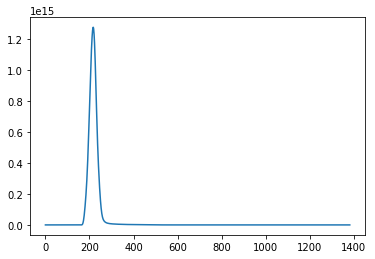

In [32]:
conv = np.convolve(proton_y, pulse_60, mode='full')
plt.plot(conv)